In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker

# Figure 1 - Steady Extensional Stress

In [3]:
########## Load data - applied flow rates, steady state stress, viscosity for each system ########## 
# Our associative polymer systems, denoted as N80S20, 
# consist of N=80 beads per chain with 4 stickers evenly distributed along the backbone.
# The stickers are spaced S=20 beads apart. The cohesive energy U of stickers is varied from 9 to 18kT.
# The unassociative normal melt is denoted as N80.

D = np.load('data/steady_state_stress_and_viscosity_N80S20_DA_U18.npy')
rate_N80S20_18kT_DA = D[:,0]
avg_E_N80S20_18kT_DA = D[:,1]
avg_v_N80S20_18kT_DA = D[:,2]

D = np.load('data/steady_state_stress_and_viscosity_N80S20_DA_U15.npy')
rate_N80S20_15kT_DA = D[:,0]
avg_E_N80S20_15kT_DA = D[:,1]
avg_v_N80S20_15kT_DA = D[:,2]

D = np.load('data/steady_state_stress_and_viscosity_N80S20_DA_U12.npy')
rate_N80S20_12kT_DA = D[:,0]
avg_E_N80S20_12kT_DA = D[:,1]
avg_v_N80S20_12kT_DA = D[:,2]

D = np.load('data/steady_state_stress_and_viscosity_N80S20_DA_U9.npy')
rate_N80S20_9kT_DA = D[:,0]
avg_E_N80S20_9kT_DA = D[:,1]
avg_v_N80S20_9kT_DA = D[:,2]

D = np.load('data/steady_state_stress_and_viscosity_N80.npy')
rate_N80 = D[:,0]
avg_E_N80 = D[:,1]
avg_v_N80 = D[:,2]

# define sticker lifetime measured at equilibrium condition
tauS_18kT_eq = 10198853.72
tauS_15kT_eq = 1050673.477
tauS_12kT_eq = 96524.57151
tauS_9kT_eq = 7103.938436
# define the number of stickers per chain (f)
f = 4
# define sticky Rouse timescale for our associative systems with varying cohesive energies
# tauRS = tauS*f^2
# where tauS = sticker lifetime measured at equilibrium, f = number of stickers per chain
tauRS_18kT_eq = tauS_18kT_eq*f**2
tauRS_15kT_eq = tauS_15kT_eq*f**2
tauRS_12kT_eq = tauS_12kT_eq*f**2
tauRS_9kT_eq = tauS_9kT_eq*f**2
# define intrinsic Rouse relaxation timescale for unassociative normal melt
tauE = 1980 # entanglement time
Ne = 28 # entanglement size = 28 beads per entanglement
N = 80 # chain length = 80 beads per chain
tauR0_N80 = tauE*(N/Ne)**2


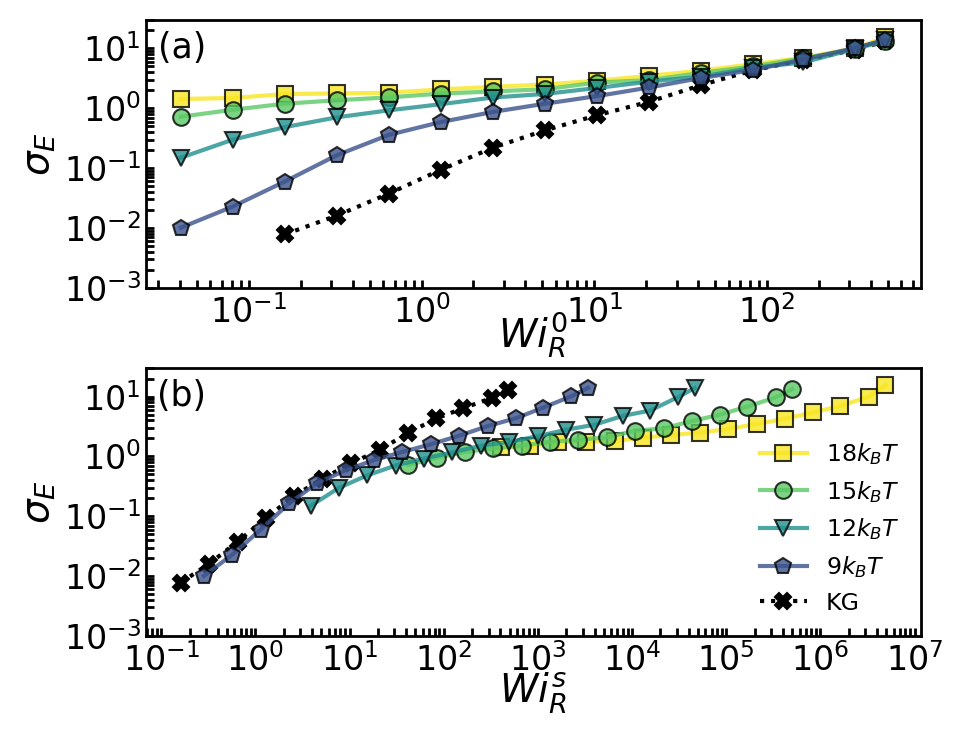

In [5]:
Vir = plt.cm.viridis(np.linspace(0.25,0.99,4)) # color

fg,ax =plt.subplots(2,1,sharey=True,figsize=(10,8))
fg.subplots_adjust(hspace=0.3)

ax[0].loglog(rate_N80S20_18kT_DA*tauR0_N80,avg_E_N80S20_18kT_DA,'s-',color=Vir[3],mec='k',alpha=0.8)
ax[0].loglog(rate_N80S20_15kT_DA*tauR0_N80,avg_E_N80S20_15kT_DA,'o-',color=Vir[2],mec='k',alpha=0.8)
ax[0].loglog(rate_N80S20_12kT_DA*tauR0_N80,avg_E_N80S20_12kT_DA,'v-',color=Vir[1],mec='k',alpha=0.8)
ax[0].loglog(rate_N80S20_9kT_DA*tauR0_N80,avg_E_N80S20_9kT_DA,'p-',color=Vir[0],mec='k',alpha=0.8)
ax[0].loglog(rate_N80*tauR0_N80,avg_E_N80,'X:',color='k',mec='k',zorder=0)

ax[1].loglog(rate_N80S20_18kT_DA*tauRS_18kT_eq,avg_E_N80S20_18kT_DA,'s-',label='18$k_BT$',color=Vir[3],mec='k',alpha=0.8)
ax[1].loglog(rate_N80S20_15kT_DA*tauRS_15kT_eq,avg_E_N80S20_15kT_DA,'o-',label='15$k_BT$',color=Vir[2],mec='k',alpha=0.8)
ax[1].loglog(rate_N80S20_12kT_DA*tauRS_12kT_eq,avg_E_N80S20_12kT_DA,'v-',label='12$k_BT$',color=Vir[1],mec='k',alpha=0.8)
ax[1].loglog(rate_N80S20_9kT_DA*tauRS_9kT_eq,avg_E_N80S20_9kT_DA,'p-',label='9$k_BT$',color=Vir[0],mec='k',alpha=0.8)
ax[1].loglog(rate_N80*tauR0_N80,avg_E_N80,'X:',label='KG',color='k',mec='k',zorder=0)


ax[0].set_xlabel('$Wi_R^0$',labelpad=-15)
ax[1].set_xlabel('$Wi_R^s$',labelpad=-5)
ax[0].set_ylabel(r'$\sigma_E$')
ax[1].set_ylabel(r'$\sigma_E$')

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax[0].yaxis.set_minor_locator(locmin)
ax[0].yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax[1].xaxis.set_minor_locator(locmin)
ax[1].xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax[1].set_xticks([1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6,1e7])
ax[1].set_ylim(top=30,bottom=10e-4)
ax[1].set_yticks([1e-3,1e-2,1e-1,1e0,1e1])

ax[1].legend(fontsize=17,frameon=False,ncol=1)

ax[0].text(0.3e-1,7,'(a)',fontsize=25)
ax[1].text(0.9e-1,7,'(b)',fontsize=25)

plt.show()


# Figure 2 - Steady Extensional Viscosity Compared with Experimental Data

In [8]:
# Webplot digitized from literature of H-bonding network under uniaxial extensional flow from:
# Shabbir, A., Goldansaz, H., Hassager, O., van Ruymbeke, E., & Alvarez, N. J. (2015). 
# Effect of Hydrogen Bonding on Linear and Nonlinear Rheology of Entangled Polymer Melts. 
# Macromolecules, 48(16), 5988–5996. https://doi.org/10.1021/acs.macromol.5b00757

# PnBA
strain_rate_PnBA = np.array([0.3,1,2,3])[::-1]
time_PnBA = np.array([1.826287598,2.837718079,5.778577314,18.03293994])
max_stress_PnBA = np.array([222104.7055,279838.7279,328790.6711,376064.6777])

# AA6
strain_rate_AA6 = np.array([0.001,0.003,0.01,0.1,1])[::-1]
time_AA6 = np.array([5.709774061,46.96028505,435.9249096,1561.963053,3000.968811])
max_stress_AA6 = np.array([1555123.424,3409326.07,8532551.107,20848253.18,5401118.547])


# AA13
strain_rate_AA13 = np.array([0.0006,0.001,0.003,0.01,0.1,1])[::-1]
time_AA13 = np.array([4.183730348,24.79588663,327.0231001,1357.730619,2814.969667,4712.618344])
max_stress_AA13 = np.array([1215319.745,5129767.951,29337743.69,91392814.54,138577847.4,156833826.8])


# AA38
strain_rate_AA38 = np.array([0.001,0.003,0.01,0.1,1])[::-1]
time_AA38 = np.array([2.843825705,20.45680167,192.6536201,552.7558096,1718.897152])
max_stress_AA38 = np.array([7517098.183,20113105.29,112388228,208347557.8,600897044.1])

# Sticky Rouse timescale taken from Table 3 in literature:
# Wagner, M. H., Narimissa, E., & Shabbir, A. (2022). 
# Modelling the effect of hydrogen bonding on elongational flow of supramolecular polymer melts. 
# Rheol. Acta, 61(8–9), 637–647. https://doi.org/10.1007/s00397-022-01352-1

tauRS_PnBA = 0.44*5**2
tauRS_AA6 = 0.44*75**2
tauRS_AA13 = 0.44*400**2
tauRS_AA38 = 440*260**2

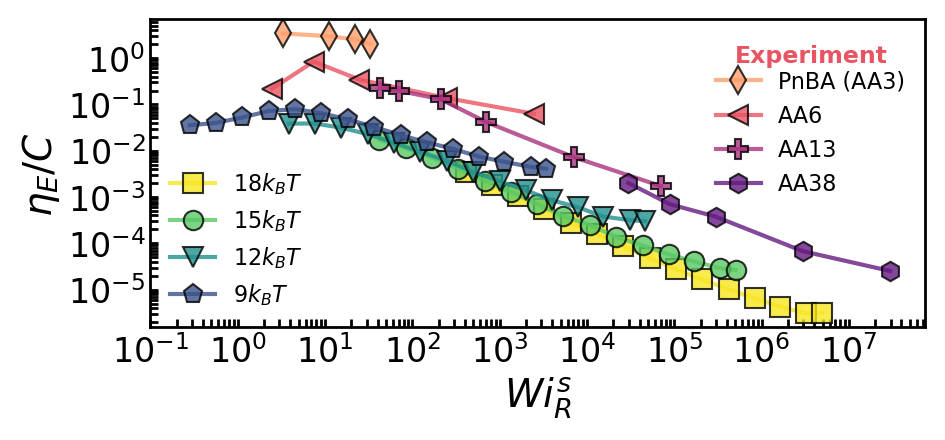

In [10]:
fg,ax = plt.subplots(1,1,figsize = (10,4))

lines=[]

Vir = plt.cm.viridis(np.linspace(0.25,0.99,4))
Mag = plt.cm.magma(np.linspace(0.3,0.8,4))

lines += ax.loglog(rate_N80S20_18kT_DA*tauRS_18kT_eq,avg_v_N80S20_18kT_DA/tauRS_18kT_eq,'s-',label='18$k_BT$',color=Vir[3],mec='k',alpha=0.8,markersize=14)
lines += ax.loglog(rate_N80S20_15kT_DA*tauRS_15kT_eq,avg_v_N80S20_15kT_DA/tauRS_15kT_eq,'o-',label='15$k_BT$',color=Vir[2],mec='k',alpha=0.8,markersize=14)
lines += ax.loglog(rate_N80S20_12kT_DA*tauRS_12kT_eq,avg_v_N80S20_12kT_DA/tauRS_12kT_eq,'v-',label='12$k_BT$',color=Vir[1],mec='k',alpha=0.8,markersize=14)
lines += ax.loglog(rate_N80S20_9kT_DA*tauRS_9kT_eq,avg_v_N80S20_9kT_DA/tauRS_9kT_eq,'p-',label='9$k_BT$',color=Vir[0],mec='k',alpha=0.8,markersize=14)


C = 1e4 # a constant to vertically shift experimental data
lines += ax.loglog(strain_rate_PnBA*tauRS_PnBA,max_stress_PnBA/tauRS_PnBA/C,'d-',label='PnBA (AA3)',mec='k',markersize=14,color=Mag[3],alpha=0.8)
lines += ax.plot(strain_rate_AA6*tauRS_AA6,max_stress_AA6/tauRS_AA6/C,'<-', label='AA6',mec='k',markersize=14,color=Mag[2],alpha=0.8)
lines += ax.plot(strain_rate_AA13*tauRS_AA13,max_stress_AA13/tauRS_AA13/C,'P-',label='AA13',mec='k',markersize=14,color=Mag[1],alpha=0.8)
lines += ax.plot(strain_rate_AA38*tauRS_AA38,max_stress_AA38/tauRS_AA38/C,'h-', label='AA38',mec='k',markersize=14,color=Mag[0],alpha=0.8)


plt.xlabel('$Wi_R^s$')
plt.ylabel(r'$\eta_E/C$')


locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.set_xticks([1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6,1e7])

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1e0])

from matplotlib.legend import Legend
leg = Legend(ax, lines[:4], ['18$k_BT$', '15$k_BT$', '12$k_BT$', '9$k_BT$'],
             loc='lower left', frameon=False,fontsize=16,bbox_to_anchor=(0, 0.))
ax.add_artist(leg)
leg = Legend(ax, lines[4:], ['PnBA (AA3)','AA6','AA13','AA38'],
             loc='upper right', frameon=False,fontsize=16,bbox_to_anchor=(1, 0.9))
ax.add_artist(leg)

ax.text(5e5,0.8,'Experiment',fontsize=17,color=Mag[2],weight='bold')

plt.show()


# Figure 3 - Distribution of End-to-End Distance $P(R)$

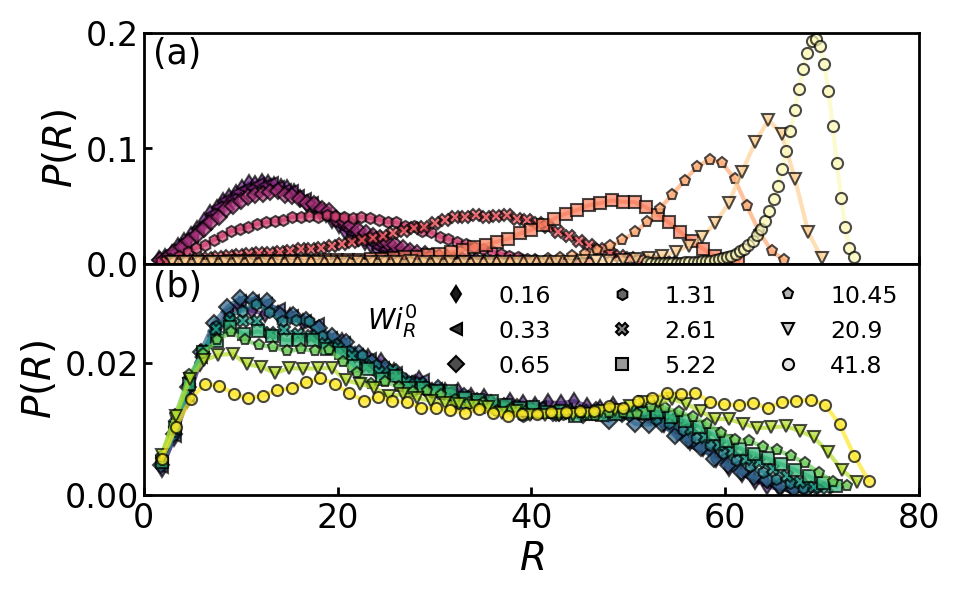

In [13]:
fg,ax = plt.subplots(2,1,sharex=True,figsize = (10,6))
fg.subplots_adjust(hspace=0)

rate = ['1e-5','2e-5','4e-5','8e-5','1.6e-4','3.2e-4','6.46e-4','1.29e-3','2.58e-3']
n = len(rate)
mt = ['o','v','p','s','X','h','D','<','d'][::-1]

colors = plt.cm.magma(np.linspace(0.3,0.99, n))
c=0
for j in range(len(rate)):
    D = np.load('data/steady_state_end_to_end_distance_distribution_N80_rate_'+str(rate[j])+'.npy')
    xbin = D[:,0]
    y_R = D[:,1]
    ax[0].plot(xbin,y_R,ls='-',marker=mt[c],color=colors[j],mec='k',alpha=0.7,markersize=8)
    c+=1

colors = plt.cm.viridis(np.linspace(0.1,1, n))
c=0
for j in range(len(rate)):
    D = np.load('data/steady_state_end_to_end_distance_distribution_N80S20_DA_U18_rate_'+str(rate[j])+'.npy')
    xbin = D[:,0]
    y_R = D[:,1]
    ax[1].plot(xbin,y_R,ls='-',marker=mt[c],color=colors[j],mec='k',alpha=0.7,markersize=8,label=' ')
    c+=1

colors = plt.cm.cividis(np.linspace(0,1, n))

ax[1].set_xlabel('$R$')
ax[1].set_ylabel('$P(R)$')
ax[0].set_ylabel('$P(R)$')

ax[0].set_ylim([0,0.2])
ax[1].set_ylim([0,0.035])
plt.xlim(left=0,right=80)

ax[1].legend(fontsize=15,frameon=False,ncol=3)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0],marker=mt[0],ls='', color='0.1',mec='k', markersize=8,label='0.16'),
                   Line2D([0], [0],marker=mt[1],ls='', color='0.2',mec='k', markersize=8,label='0.33'),
                   Line2D([0], [0],marker=mt[2],ls='', color='0.3',mec='k', markersize=8,label='0.65'),
                   Line2D([0], [0],marker=mt[3],ls='', color='0.4',mec='k', markersize=8,label='1.31'),
                   Line2D([0], [0],marker=mt[4],ls='', color='0.5',mec='k', markersize=8,label='2.61'),
                   Line2D([0], [0],marker=mt[5],ls='', color='0.6',mec='k', markersize=8,label='5.22'),
                   Line2D([0], [0],marker=mt[6],ls='', color='0.7',mec='k', markersize=8,label='10.45'),
                   Line2D([0], [0],marker=mt[7],ls='', color='0.8',mec='k', markersize=8,label='20.9'),
                   Line2D([0], [0],marker=mt[8],ls='', color='0.9',mec='k', markersize=8,label='41.8')
                  ]

ax[1].legend(handles=legend_elements, frameon=False,fontsize=17,ncol=3 )

ax[1].text(23,0.025,'$Wi_R^0$',fontsize=20)
ax[0].text(1,0.173,'(a)',fontsize=25)
ax[1].text(1,0.03,'(b)',fontsize=25)

plt.show()

# Fig 5 - Comparison of Steady Extensional Viscosity $\eta_E$, tumbling timescale $\tau_c$, and sticker lifetime $\tau_s$

In [16]:
########### load - tumbling timescale (tau_con) and sticker lifetime (tauS) for associative systems under uniaxial extension
D = np.load('data/steady_state_tauC_and_tauS_N80S20_DA_U18.npy')
rate_N80S20_18kT_DA = D[:,0]
tau_con_N80S20_18kT_DA = D[:,1]
tauS_N80S20_18kT_DA = D[:,2]

D = np.load('data/steady_state_tauC_and_tauS_N80S20_DA_U15.npy')
rate_N80S20_15kT_DA = D[:,0]
tau_con_N80S20_15kT_DA = D[:,1]
tauS_N80S20_15kT_DA = D[:,2]

D = np.load('data/steady_state_tauC_and_tauS_N80S20_DA_U12.npy')
rate_N80S20_12kT_DA = D[:,0]
tau_con_N80S20_12kT_DA = D[:,1]
tauS_N80S20_12kT_DA = D[:,2]

D = np.load('data/steady_state_tauC_and_tauS_N80S20_DA_U9.npy')
rate_N80S20_9kT_DA = D[:,0]
tau_con_N80S20_9kT_DA = D[:,1]
tauS_N80S20_9kT_DA = D[:,2]

########### load - tumbling timescale (tau_con) for unassociative normal melt under simple shear
D = np.load('data/steady_state_tauC_N80_shear.npy')
rate_N80_shear = D[:,0]
tau_con_N80_shear = D[:,1]

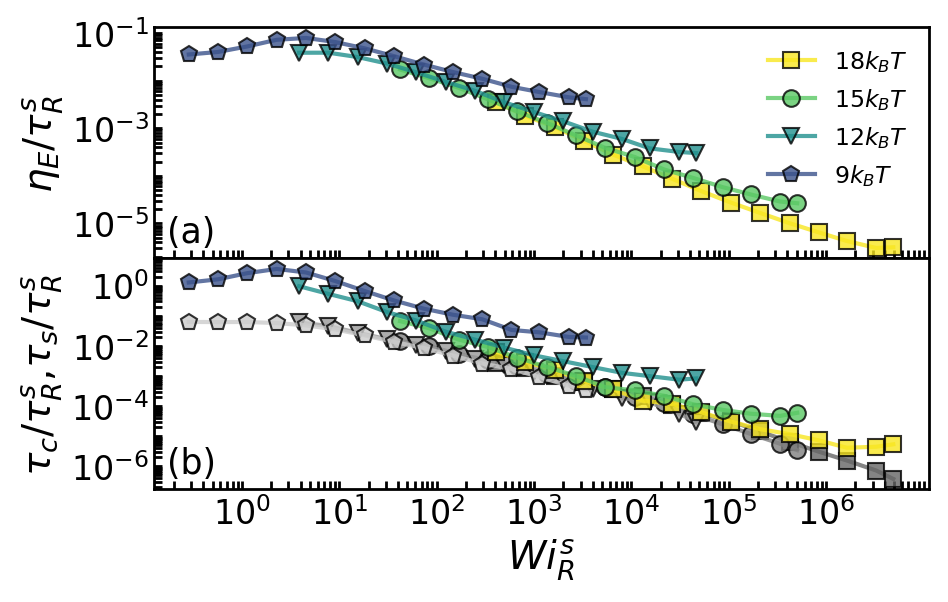

In [18]:
fg,ax = plt.subplots(2,1,sharex=True,figsize = (10,6))
plt.subplots_adjust(hspace=0)

ax[0].loglog(rate_N80S20_18kT_DA*tauRS_18kT_eq,np.array(avg_v_N80S20_18kT_DA)/tauRS_18kT_eq,'s-',color=Vir[3],mec='k',alpha=0.8,label='18$k_BT$')
ax[0].loglog(rate_N80S20_15kT_DA*tauRS_15kT_eq,np.array(avg_v_N80S20_15kT_DA)/tauRS_15kT_eq,'o-',color=Vir[2],mec='k',alpha=0.8,label='15$k_BT$')
ax[0].loglog(rate_N80S20_12kT_DA*tauRS_12kT_eq,np.array(avg_v_N80S20_12kT_DA)/tauRS_12kT_eq,'v-',color=Vir[1],mec='k',alpha=0.8,label='12$k_BT$')
ax[0].loglog(rate_N80S20_9kT_DA*tauRS_9kT_eq,np.array(avg_v_N80S20_9kT_DA)/tauRS_9kT_eq,'p-',color=Vir[0],mec='k',alpha=0.8,label='9$k_BT$')

ax[1].loglog(rate_N80S20_18kT_DA*tauRS_18kT_eq,np.array(tauS_N80S20_18kT_DA)/tauRS_18kT_eq,'s-',color='0.4',mec='k',alpha=0.8)
ax[1].loglog(rate_N80S20_15kT_DA*tauRS_15kT_eq,np.array(tauS_N80S20_15kT_DA)/tauRS_15kT_eq,'o-',color='0.5',mec='k',alpha=0.8)
ax[1].loglog(rate_N80S20_12kT_DA*tauRS_12kT_eq,np.array(tauS_N80S20_12kT_DA)/tauRS_12kT_eq,'v-',color='0.6',mec='k',alpha=0.8)
ax[1].loglog(rate_N80S20_9kT_DA*tauRS_9kT_eq,np.array(tauS_N80S20_9kT_DA)/tauRS_9kT_eq,'p-',color='0.8',mec='k',alpha=0.8)

ax[1].loglog(rate_N80S20_18kT_DA*tauRS_18kT_eq,np.array(tau_con_N80S20_18kT_DA)/tauRS_18kT_eq,'s-',color=Vir[3],mec='k',alpha=0.8,label='18$k_BT$')
ax[1].loglog(rate_N80S20_15kT_DA*tauRS_15kT_eq,np.array(tau_con_N80S20_15kT_DA)/tauRS_15kT_eq,'o-',color=Vir[2],mec='k',alpha=0.8,label='15$k_BT$')
ax[1].loglog(rate_N80S20_12kT_DA*tauRS_12kT_eq,np.array(tau_con_N80S20_12kT_DA)/tauRS_12kT_eq,'v-',color=Vir[1],mec='k',alpha=0.8,label='12$k_BT$')
ax[1].loglog(rate_N80S20_9kT_DA*tauRS_9kT_eq,np.array(tau_con_N80S20_9kT_DA)/tauRS_9kT_eq,'p-',color=Vir[0],mec='k',alpha=0.8,label='9$k_BT$')

ax[0].set_ylabel(r'$\eta_{E}/\tau_R^{s}$')
ax[1].set_ylabel(r'$\tau_{c}/\tau_R^{s}$'+','+r'$\tau_{s}/\tau_R^{s}$')
ax[1].set_xlabel('$Wi_R^s$')

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax[0].yaxis.set_minor_locator(locmin)
ax[0].yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax[0].set_yticks([1e-5,1e-3,1e-1])

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax[1].yaxis.set_minor_locator(locmin)
ax[1].yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax[1].set_yticks([1e-6,1e-4,1e-2,1e0])

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax[1].xaxis.set_minor_locator(locmin)
ax[1].xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax[1].set_xticks([1e0,1e1,1e2,1e3,1e4,1e5,1e6])

ax[0].legend(loc='upper right',fontsize=17,frameon=False,ncol=1)

ax[0].text(0.17,0.4e-5,'(a)',fontsize=25)
ax[1].text(0.17,0.6e-6,'(b)',fontsize=25)

plt.show()

# Supplemental Figures

## Supplemental Fig 1 - Steady State Bond Length, End-to-End Extension Ratio, Orientation Order Parameter

In [22]:
########## load data - applied flow rates, steady state average bond length, end-to-end extension ratio, P2 order parameter
D = np.load('data/steady_state_bond_length_and_end_to_end_extension_ratio_and_orientation_order_parameter_N80S20_DA_U18.npy')
rate_N80S20_18kT_DA = D[:,0]
avg_bond_N80S20_18kT_DA = D[:,1]
h_ee_N80S20_18kT_DA = D[:,2]
P2_ee_N80S20_18kT_DA = D[:,3]

D = np.load('data/steady_state_bond_length_and_end_to_end_extension_ratio_and_orientation_order_parameter_N80S20_DA_U15.npy')
rate_N80S20_15kT_DA = D[:,0]
avg_bond_N80S20_15kT_DA = D[:,1]
h_ee_N80S20_15kT_DA = D[:,2]
P2_ee_N80S20_15kT_DA = D[:,3]

D = np.load('data/steady_state_bond_length_and_end_to_end_extension_ratio_and_orientation_order_parameter_N80S20_DA_U12.npy')
rate_N80S20_12kT_DA = D[:,0]
avg_bond_N80S20_12kT_DA = D[:,1]
h_ee_N80S20_12kT_DA = D[:,2]
P2_ee_N80S20_12kT_DA = D[:,3]

D = np.load('data/steady_state_bond_length_and_end_to_end_extension_ratio_and_orientation_order_parameter_N80S20_DA_U9.npy')
rate_N80S20_9kT_DA = D[:,0]
avg_bond_N80S20_9kT_DA = D[:,1]
h_ee_N80S20_9kT_DA = D[:,2]
P2_ee_N80S20_9kT_DA = D[:,3]

D = np.load('data/steady_state_bond_length_and_end_to_end_extension_ratio_and_orientation_order_parameter_N80.npy')
rate_N80 = D[:,0]
avg_bond_N80 = D[:,1]
h_ee_N80 = D[:,2]
P2_ee_N80 = D[:,3]


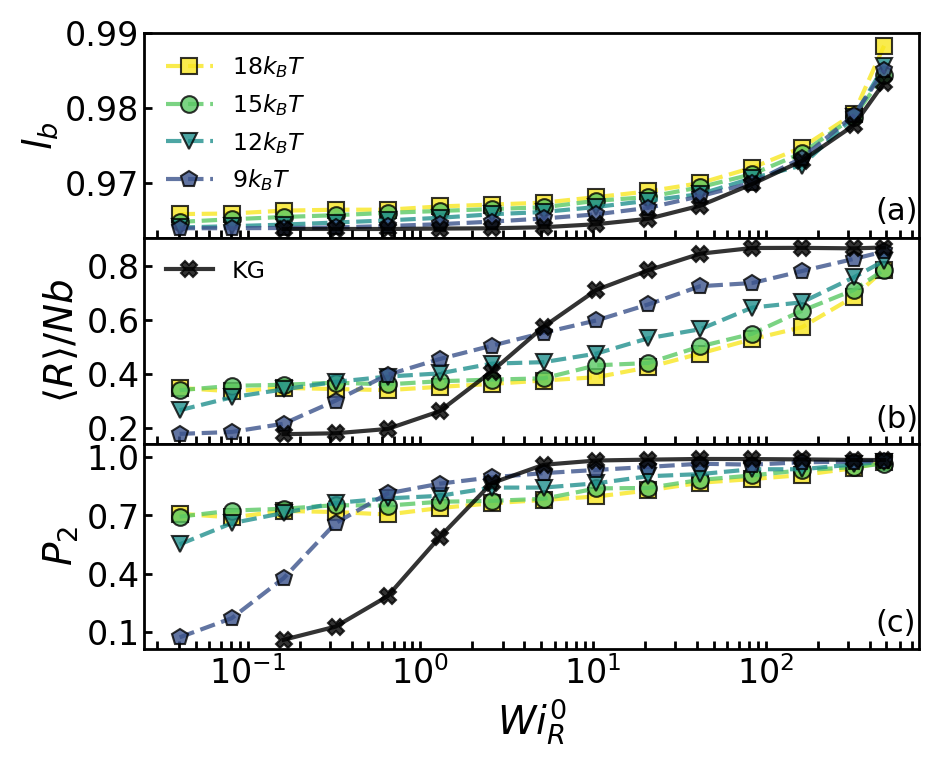

In [24]:
fg,ax =plt.subplots(3,1,sharex=True,figsize=(10,8))
fg.subplots_adjust(hspace=0)

ax[0].semilogx(rate_N80S20_18kT_DA*tauR0_N80,avg_bond_N80S20_18kT_DA,'s--',label='18$k_BT$',color=Vir[3],mec='k',alpha=0.8)
ax[0].semilogx(rate_N80S20_15kT_DA*tauR0_N80,avg_bond_N80S20_15kT_DA,'o--',label='15$k_BT$',color=Vir[2],mec='k',alpha=0.8)
ax[0].semilogx(rate_N80S20_12kT_DA*tauR0_N80,avg_bond_N80S20_12kT_DA,'v--',label='12$k_BT$',color=Vir[1],mec='k',alpha=0.8)
ax[0].semilogx(rate_N80S20_9kT_DA*tauR0_N80,avg_bond_N80S20_9kT_DA,'p--',label='9$k_BT$',color=Vir[0],mec='k',alpha=0.8)
ax[0].semilogx(rate_N80*tauR0_N80,avg_bond_N80,'kX-',mec='k',alpha=0.8)

ax[0].set_ylabel(r'$l_b$')
ax[0].legend(frameon=False,fontsize=17)
ax[0].set_yticks([0.99,0.98,0.97])


ax[1].semilogx(rate_N80S20_18kT_DA*tauR0_N80,h_ee_N80S20_18kT_DA,'s--',color=Vir[3],mec='k',alpha=0.8)
ax[1].semilogx(rate_N80S20_15kT_DA*tauR0_N80,h_ee_N80S20_15kT_DA,'o--',color=Vir[2],mec='k',alpha=0.8)
ax[1].semilogx(rate_N80S20_12kT_DA*tauR0_N80,h_ee_N80S20_12kT_DA,'v--',color=Vir[1],mec='k',alpha=0.8)
ax[1].semilogx(rate_N80S20_9kT_DA*tauR0_N80,h_ee_N80S20_9kT_DA,'p--',color=Vir[0],mec='k',alpha=0.8)
ax[1].semilogx(rate_N80*tauR0_N80,h_ee_N80,'kX-',label='KG',mec='k',alpha=0.8)

ax[1].set_ylabel(r'$\langle R \rangle/Nb$')
ax[1].legend(frameon=False,fontsize=17)
ax[1].set_yticks([0.2,0.4,0.6,0.8])


ax[2].semilogx(rate_N80S20_18kT_DA*tauR0_N80,P2_ee_N80S20_18kT_DA,'s--',label='N80S20 DA 18$k_BT$',color=Vir[3],mec='k',alpha=0.8)
ax[2].semilogx(rate_N80S20_15kT_DA*tauR0_N80,P2_ee_N80S20_15kT_DA,'o--',label='N80S20 DA 15$k_BT$',color=Vir[2],mec='k',alpha=0.8)
ax[2].semilogx(rate_N80S20_12kT_DA*tauR0_N80,P2_ee_N80S20_12kT_DA,'v--',label='N80S20 DA 12$k_BT$',color=Vir[1],mec='k',alpha=0.8)
ax[2].semilogx(rate_N80S20_9kT_DA*tauR0_N80,P2_ee_N80S20_9kT_DA,'p--',label='N80S20 DA 9$k_BT$',color=Vir[0],mec='k',alpha=0.8)
ax[2].semilogx(rate_N80*tauR0_N80,P2_ee_N80,'kX-',label='KG UEF',mec='k',alpha=0.8)

ax[2].set_ylabel(r'$P_2$')
ax[2].set_yticks([0.1,0.4,0.7,1])
ax[2].set_ylim(top=1.07)

plt.xlabel('$Wi_R^0$')

ax[0].text(430,0.965,'(a)',fontsize=22)
ax[1].text(430,0.2,'(b)',fontsize=22)
ax[2].text(430,0.1,'(c)',fontsize=22)

plt.show()



## Supplemental Fig 2 - Fluctuation of End-to-End Extension Ratio over Strain (Time)

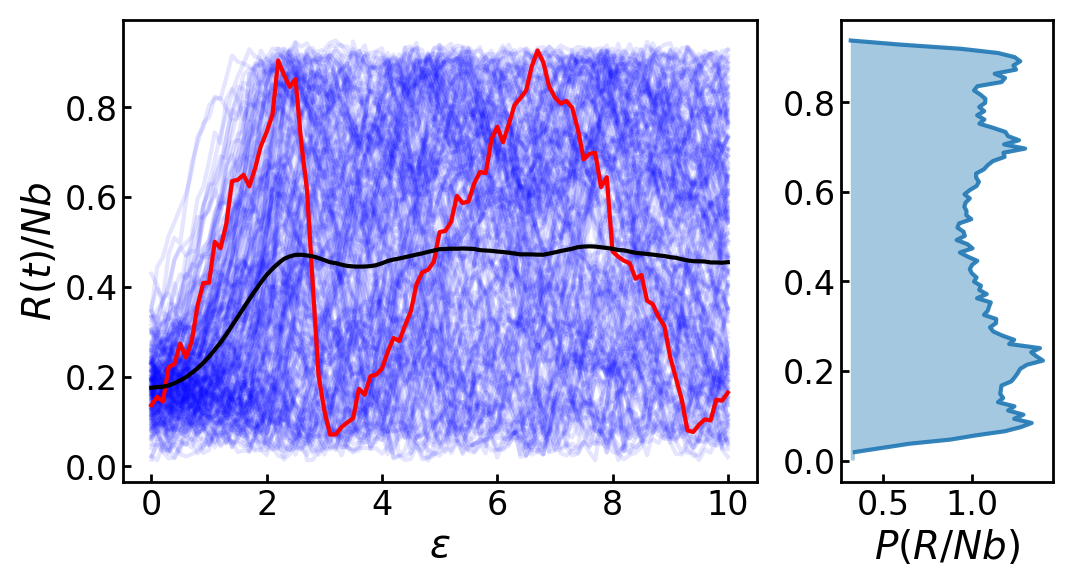

In [27]:
rate = '2.58e-3'
data = np.load('data/end_to_end_extension_ratio_over_time_N80S20_DA_U18_rate_'+rate+'_uniaxial.npy')
Nf = data.shape[0] # number of timeframe
M = 2000 # number of chains

fg,ax = plt.subplots(1,2,figsize = (12,6),gridspec_kw={'width_ratios': [3,1]})
for m in np.arange(0,M,10):
    ax[0].plot(np.arange(Nf)/10,data[:,m],color='b',alpha=0.1,zorder=0)
    if (m==90):
        ax[0].plot(np.arange(Nf)/10,data[:,m],lw=3,color='r',label=str(m))
        
ax[0].set_xlabel(r'$\epsilon$')
ax[0].set_ylabel('$R(t)/Nb$')
ax[0].plot(np.arange(Nf)/10,data.mean(axis=1),color='k')

Nf = data.shape[0]
h_eq = []
xbin_eq = []
for i in np.arange(40,Nf):
    h,xe = np.histogram(data[i],bins=100,density=True)
    xbin = (xe[:-1] + xe[1:])/2
    h_eq.append(h)
    xbin_eq.append(xbin)
ax[1].plot(np.array(h_eq).mean(axis=0),np.array(xbin_eq).mean(axis=0),'-',mec='k',alpha=0.9)
ax[1].fill_between(np.array(h_eq).mean(axis=0),np.array(xbin_eq).mean(axis=0), alpha=0.4)

ax[1].set_xlabel('$P(R/Nb)$')

plt.show()

## Supplemental Fig3 - Time Correlation of Unit End-to-End Vecor and Chain Tumbling Timescale

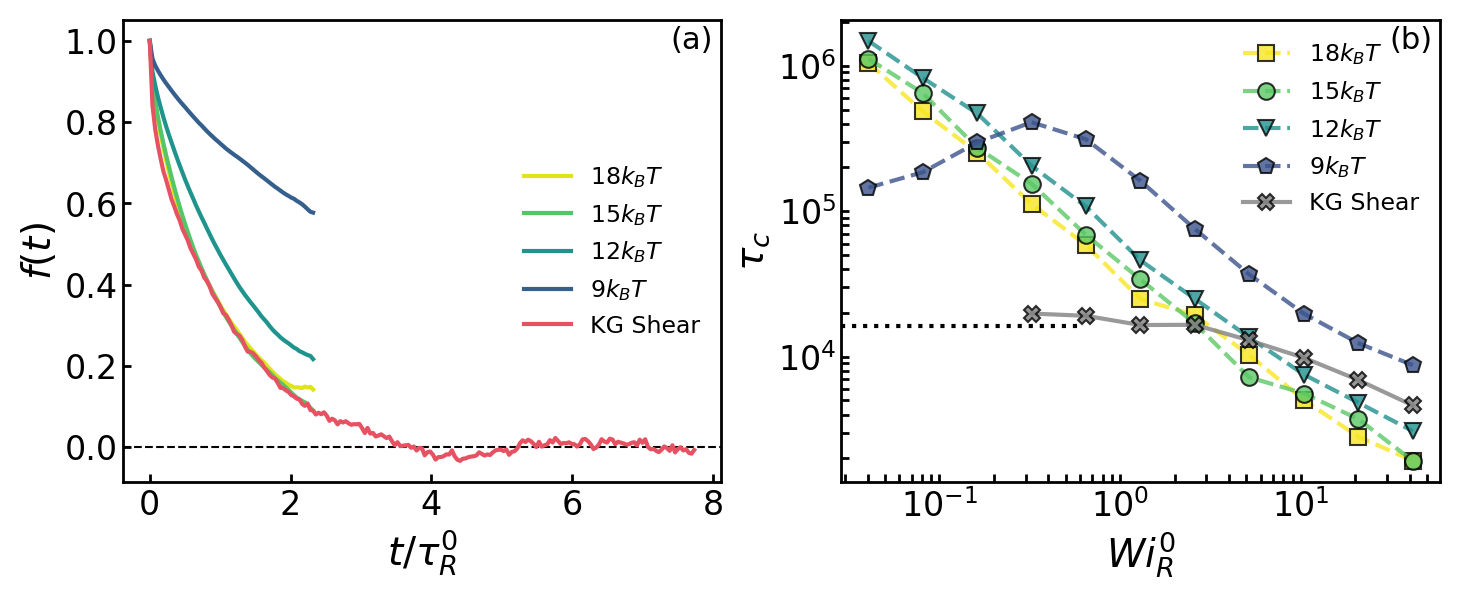

In [30]:
fg,ax = plt.subplots(1,2,figsize = (17,6))

colors = plt.cm.viridis(np.linspace(0.3,0.95,4))

# ########## Load data - correlation function 
D = np.load('./data/unit_end_to_end_correlation_function_N80S20_DA_U18_rate_1.6e-4_UEF.npy')
normalized_time = D[:,0]
Cuee = D[:,1]
ax[0].plot(normalized_time,Cuee,label='$18k_BT$',color=colors[3])

D = np.load('./data/unit_end_to_end_correlation_function_N80S20_DA_U15_rate_1.6e-4_UEF.npy')
normalized_time = D[:,0]
Cuee = D[:,1]
ax[0].plot(normalized_time,Cuee,label='$15k_BT$',color=colors[2])

D = np.load('./data/unit_end_to_end_correlation_function_N80S20_DA_U12_rate_1.6e-4_UEF.npy')
normalized_time = D[:,0]
Cuee = D[:,1]
ax[0].plot(normalized_time,Cuee,label='$12k_BT$',color=colors[1])

D = np.load('./data/unit_end_to_end_correlation_function_N80S20_DA_U9_rate_1.6e-4_UEF.npy')
normalized_time = D[:,0]
Cuee = D[:,1]
ax[0].plot(normalized_time,Cuee,label='$9k_BT$',color=colors[0])


colors = plt.cm.magma(np.linspace(0.3,0.95,5))

D = np.load('./data/unit_end_to_end_correlation_function_N80_rate_1.6e-4_shear.npy')
normalized_time = D[:,0]
Cuee = D[:,1]
ax[0].plot(normalized_time,Cuee,label='KG Shear',color=colors[2])

ax[0].legend(fontsize=17,frameon=False)
ax[0].set_xlabel(r'$t/\tau_R^0$')
ax[0].set_ylabel(r'$f(t)$')

ax[0].axhline(y=0,ls='--',color='k',lw=1.5,zorder=0)

viridis = plt.cm.viridis(np.linspace(0.25,0.98, 4))

ax[1].loglog(rate_N80S20_18kT_DA[:-4]*tauR0_N80,tau_con_N80S20_18kT_DA[:-4],'s--',label='18$k_BT$',color=Vir[3],mec='k',alpha=0.8)
ax[1].loglog(rate_N80S20_15kT_DA[:-4]*tauR0_N80,tau_con_N80S20_15kT_DA[:-4],'o--',label='15$k_BT$',color=Vir[2],mec='k',alpha=0.8)
ax[1].loglog(rate_N80S20_12kT_DA[:-4]*tauR0_N80,tau_con_N80S20_12kT_DA[:-4],'v--',label='12$k_BT$',color=Vir[1],mec='k',alpha=0.8)
ax[1].loglog(rate_N80S20_9kT_DA[:-4]*tauR0_N80,tau_con_N80S20_9kT_DA[:-4],'p--',label='9$k_BT$',color=Vir[0],mec='k',alpha=0.8)
ax[1].loglog(rate_N80_shear[:-4]*tauR0_N80,tau_con_N80_shear[:-4],'X-',color='gray',label='KG Shear',mec='k',alpha=0.8)

ax[1].set_xlabel('$Wi_R^0$')
ax[1].set_ylabel(r'$\tau_c$')
ax[1].axhline(y=tauR0_N80,xmax=0.4,ls=':',color='k')
ax[1].legend(fontsize=17,frameon=False)
ax[0].text(7.4,0.98,'(a)',fontsize=22)
ax[1].text(31,1.3e6,'(b)',fontsize=22)

plt.show()

